# Exploratory Data Analysis + Handling Missing Data

`TODO`

- Group events per RunID and date
- Examine "impossible" values
- Implement Haversine formula to fill in `speed` = NaN with `Latitude` and `Longitude`
- Tidy script 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
head = 0

In [24]:
# load full data
data = pd.read_csv('processed_data/first_pass.csv')
data.head(head)

,RunID,Time,Latitude,Longitude,Elevation,Distance,HeartRate,Cadence,Speed


In [25]:
# convert to datetime
data['Time'] = pd.to_datetime(data['Time'], errors = 'coerce', utc=True)

# extract the date in YYYY-MM-DD
data['Date'] = data['Time'].dt.date

In [26]:
# aggregate functions
agg_funcs = {
    'Elevation': 'mean',
    'Distance': 'max',
    'HeartRate': 'mean',
    'Cadence': 'mean',
    'Speed': 'mean'}

# aggregate data per run
data_per_run = data[['RunID', 
                     'Date', 
                     'Elevation', 
                     'Distance', 
                     'HeartRate', 
                     'Cadence', 
                     'Speed']].groupby(['RunID', 'Date']).agg(agg_funcs).reset_index()

In [27]:
data_per_run.head(head)

,RunID,Date,Elevation,Distance,HeartRate,Cadence,Speed


## Descriptive Analysis: Per run

In [28]:
descriptive_stats = data_per_run.describe()
pd.set_option('display.float_format', '{:.2f}'.format)
descriptive_stats[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']]

,Elevation,Distance,HeartRate,Cadence,Speed
count,503.00,498.00,505.00,495.00,22.00
mean,5.87,9030.70,140.33,78.89,2.73
std,71.55,4727.50,18.14,10.77,0.29
min,-157.46,0.00,59.00,10.56,2.13
25%,-2.59,6073.95,133.87,75.10,2.58
50%,0.75,9278.95,141.16,81.86,2.72
75%,3.77,11749.33,148.52,85.72,2.90
max,1214.28,43286.20,198.66,94.05,3.42


In [29]:
data_per_run.isna().sum()

RunID          0
Date           0
Elevation      2
Distance       7
HeartRate      0
Cadence       10
Speed        483
dtype: int64

In [30]:
data[data["Distance"] == 0].head(head)

,RunID,Time,Latitude,Longitude,Elevation,Distance,HeartRate,Cadence,Speed,Date


In [31]:
# two runs with no distance covered whatsoever
data_per_run[data_per_run["Distance"] == 0].head(head)

,RunID,Date,Elevation,Distance,HeartRate,Cadence,Speed


In [32]:
data[data["RunID"] == 1983036631].head(head)

,RunID,Time,Latitude,Longitude,Elevation,Distance,HeartRate,Cadence,Speed,Date


## Descriptive Analysis: Full

In [33]:
descriptive_stats = data.describe()
pd.set_option('display.float_format', '{:.2f}'.format)
descriptive_stats[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']].head(head)

,Elevation,Distance,HeartRate,Cadence,Speed


In [34]:
# Missing values
data.isna().sum()

RunID              0
Time               0
Latitude        4583
Longitude       4583
Elevation      43347
Distance       46752
HeartRate          0
Cadence        35926
Speed        1605333
Date               0
dtype: int64

In [35]:
print("Distance = 0:", len(data[data['Distance'] == 0]))
print("HeartRate = 0:", len(data[data['HeartRate'] == 0]))
print("Cadence = 0:", len(data[data['HeartRate'] == 0]))

Distance = 0: 708
HeartRate = 0: 0
Cadence = 0: 0


In [36]:
# Only one run which recorded heartRate = 0
data[data['HeartRate'] == 0]["RunID"].unique()

array([], dtype=int64)

In [37]:
# Why more than 506 runs???
data[data['Cadence'] == 0]["RunID"].unique()

array([ 1010000744,  1015556479,  1015556576,  1021048125,  1032868566,
        1040824037,  1046360239,  1054969048,  1061138029,  1061138074,
        1065041814,  1070743204,  1083928690,  1088907504,  1095168309,
        1095168312,  1095168313,  1095168314,  1100274646,  1111775344,
        1128721789,  1135115407,  1143732449,  1143732451,  1143732452,
        1143732453,  1143732456,  1143732606,  1146690219,  1151270033,
        1165891886,  1174679044, 11865003088, 11903067169, 11925754501,
       12025720775,  1204028250, 12064122577,  1208061158, 12184398876,
       12201261748, 12231823776, 12233748058, 12249284502, 12278091080,
       12305381020, 12344844634, 12352672778,  1300634788,  1311131861,
        1321874945,  1330620804,  1333621201,  1337239406,  1343945585,
        1347907211,  1353212430,  1358311402,  1373794681,  1383618836,
        1393127739,  1398003005,  1416818867,  1424281814,  1453459121,
        1459900225,  1472864011,  1513551575,  1513551919,  1519

## Time-series Analysis: Full

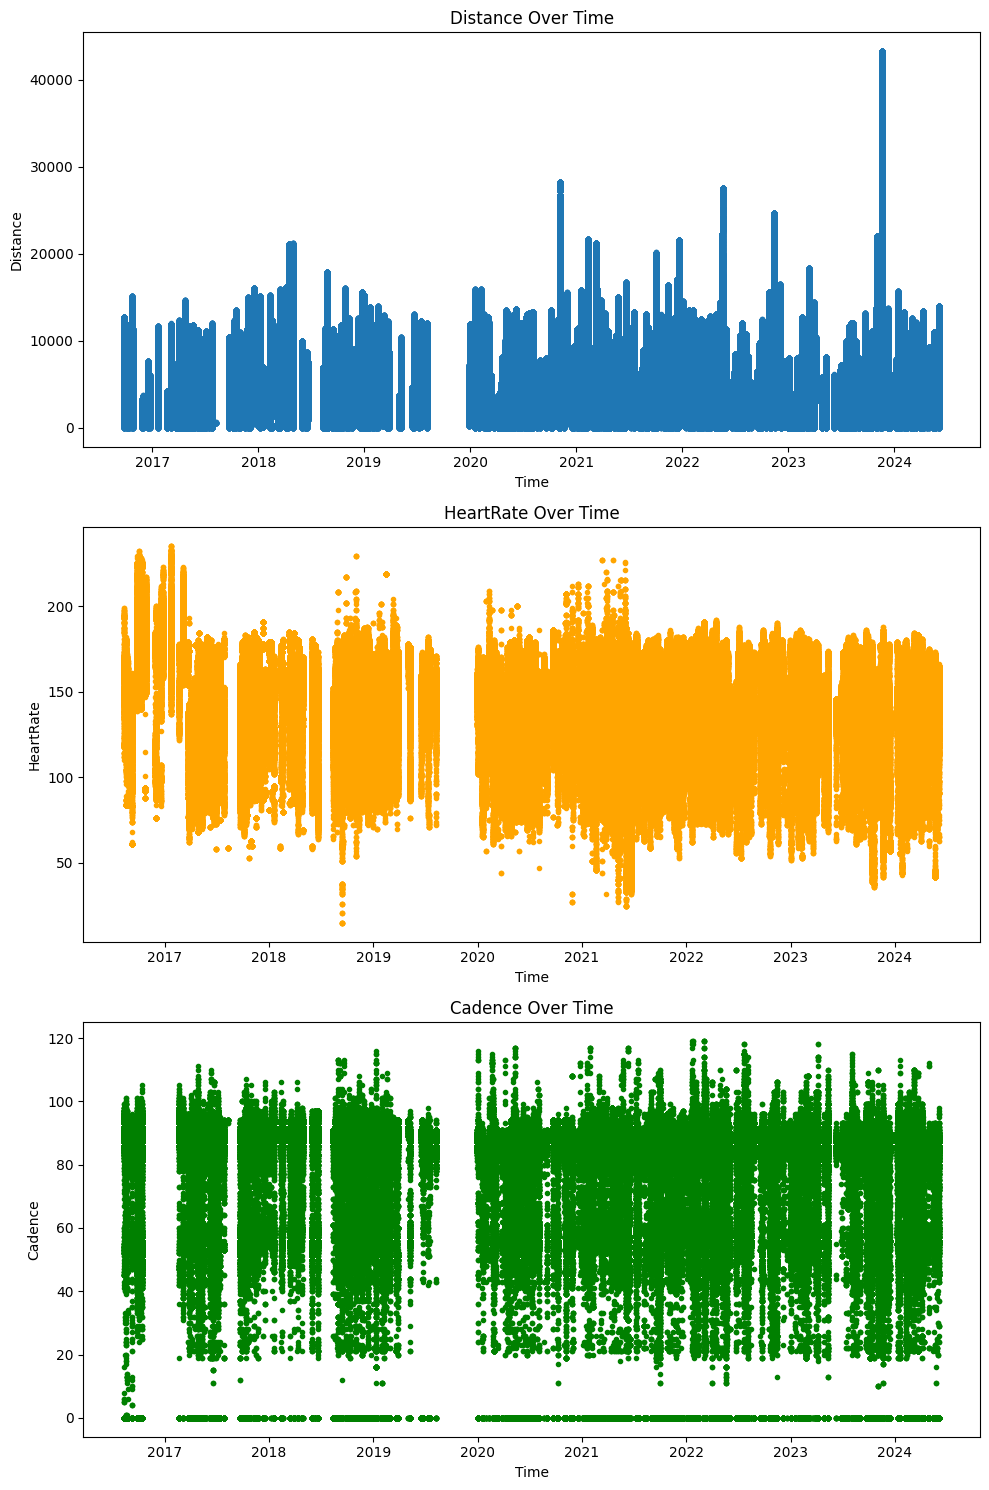

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# distance over time
ax[0].plot(data['Time'], data['Distance'], '.', label = 'Distance')
ax[0].set_title('Distance Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Distance')

# heartRate over time
ax[1].plot(data['Time'], data['HeartRate'], '.', label = 'HeartRate', color = 'orange')
ax[1].set_title('HeartRate Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('HeartRate')

# cadence over time
ax[2].plot(data['Time'], data['Cadence'], '.', label = 'Cadence', color = 'green')
ax[2].set_title('Cadence Over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Cadence')

plt.tight_layout()
plt.show()

## Time-series Analysis: Per run

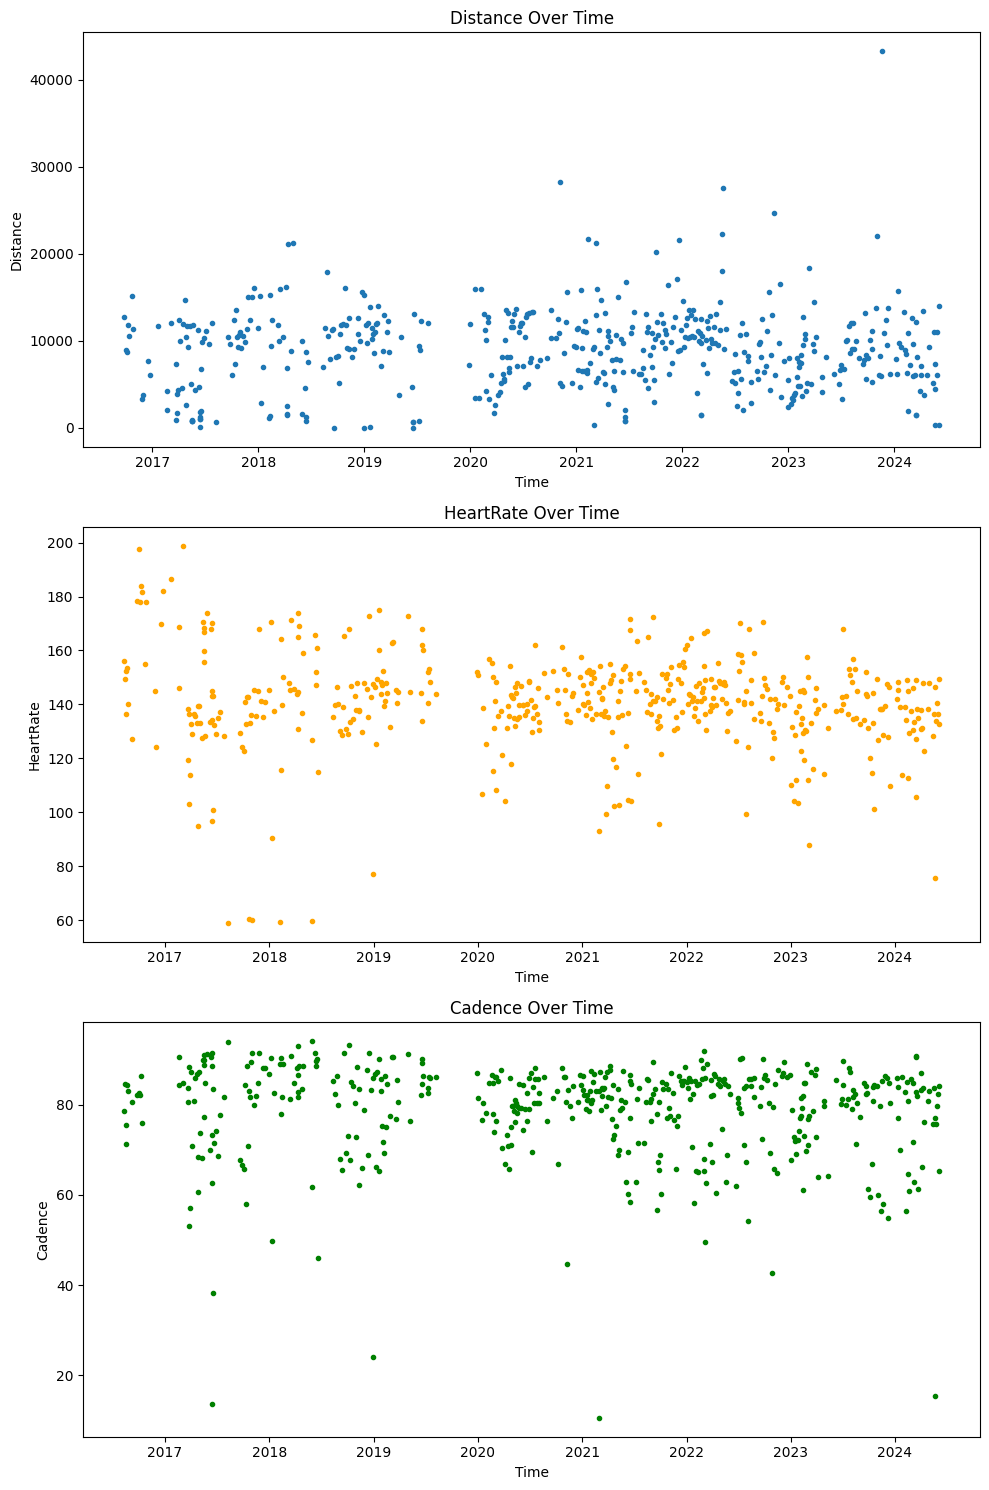

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# distance over time
ax[0].plot(data_per_run['Date'], data_per_run['Distance'], '.', label = 'Distance')
ax[0].set_title('Distance Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Distance')

# heartRate over time
ax[1].plot(data_per_run['Date'], data_per_run['HeartRate'], '.', label = 'HeartRate', color = 'orange')
ax[1].set_title('HeartRate Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('HeartRate')

# cadence over time
ax[2].plot(data_per_run['Date'], data_per_run['Cadence'], '.', label = 'Cadence', color = 'green')
ax[2].set_title('Cadence Over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Cadence')

plt.tight_layout()
plt.show()

In [40]:
# examine average heartrate below 75
data_per_run[data_per_run['HeartRate'] < 75]

,RunID,Date,Elevation,Distance,HeartRate,Cadence,Speed
58,1241530709,2017-08-09,1.46,623.40,59.00,93.87,NaN
66,1347907211,2017-10-22,-1.34,9285.90,60.29,83.07,NaN
69,1363595103,2017-11-01,5.94,9156.00,60.00,91.40,NaN
81,1508216362,2018-02-07,-4.47,1107.10,59.33,89.07,NaN
99,1730901813,2018-06-01,1.58,1546.20,59.58,94.05,NaN


In [41]:
data[data['RunID'] == 1241530709].head(head)

,RunID,Time,Latitude,Longitude,Elevation,Distance,HeartRate,Cadence,Speed,Date


## Frequency Analysis: Full

/tmp/ipykernel_42604/2707759245.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['Time'].dt.to_period('M')


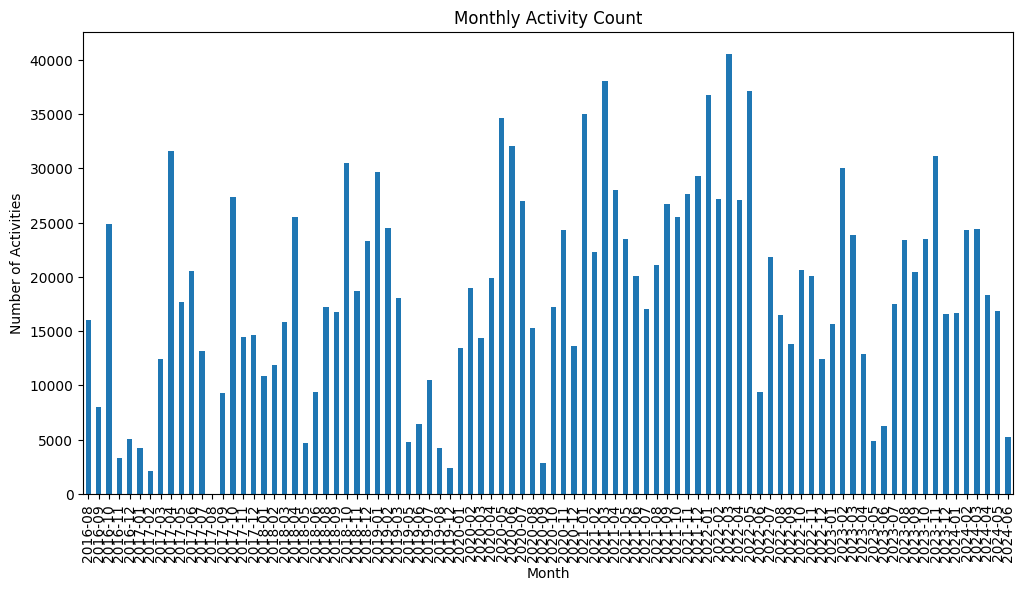

In [42]:
# extract the date part for categorical analysis
data['Date'] = data['Time'].dt.date

# extract year and month for grouping
data['YearMonth'] = data['Time'].dt.to_period('M')

# extract the day of the week for grouping
data['Weekday'] = data['Time'].dt.day_name()

# group by year and month and count activities
monthly_activity_count = data.groupby('YearMonth').size()

# group by weekday and count activities
weekday_activity_count = data.groupby('Weekday').size()

# plot monthly activity count
plt.figure(figsize=(12, 6))
monthly_activity_count.plot(kind='bar')
plt.title('Monthly Activity Count')
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.show()

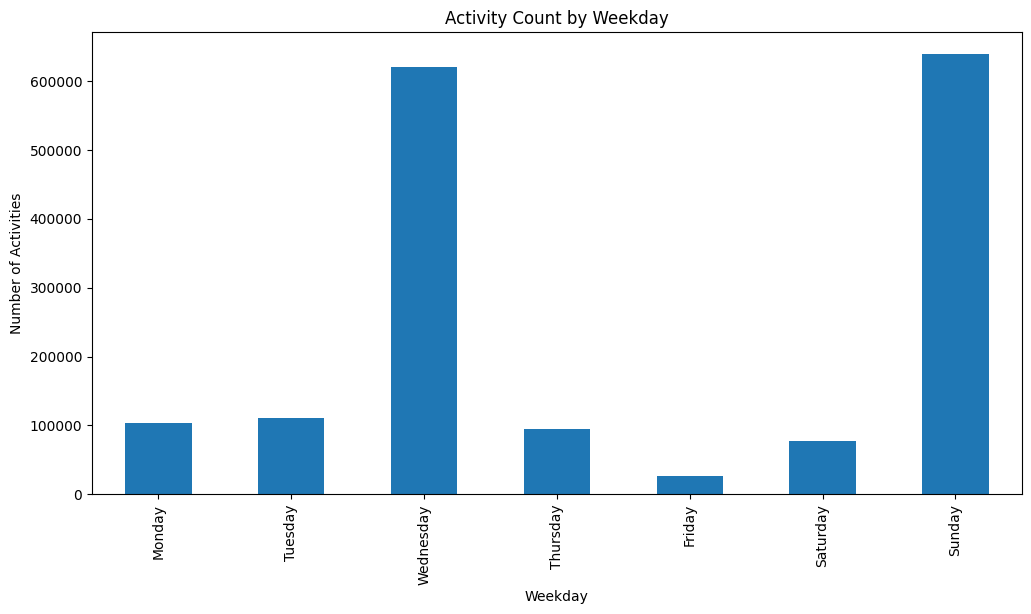

In [43]:
# to ensure the order is Monday to Sunday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity_count = weekday_activity_count.reindex(weekday_order)

# plot weekday activity count
plt.figure(figsize=(12, 6))
weekday_activity_count.plot(kind='bar')
plt.title('Activity Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Activities')
plt.show()

## Correlation Heatmap

TODO: Perform Haversine formula on NaN values in column `speed` to limit dropped rows.

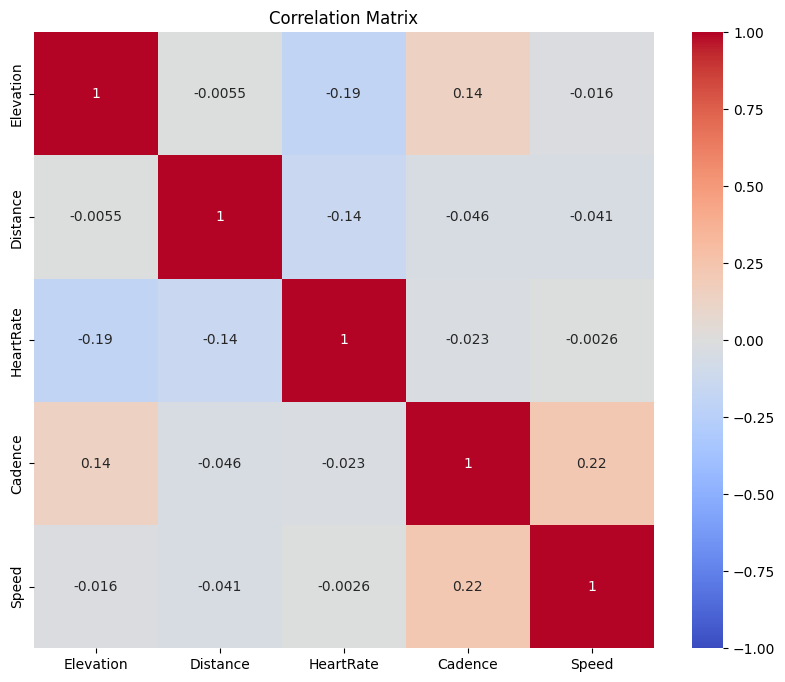

In [44]:
# drop rows with NaN values for correlation analysis
corr_data = data[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']].dropna()
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Checking outliers

Outliers defined by Z-score > 3

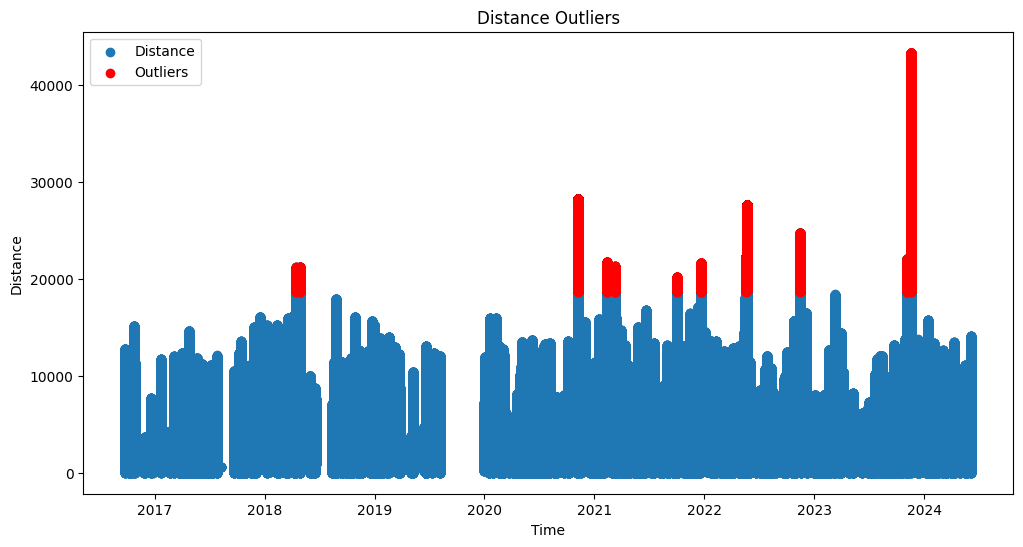

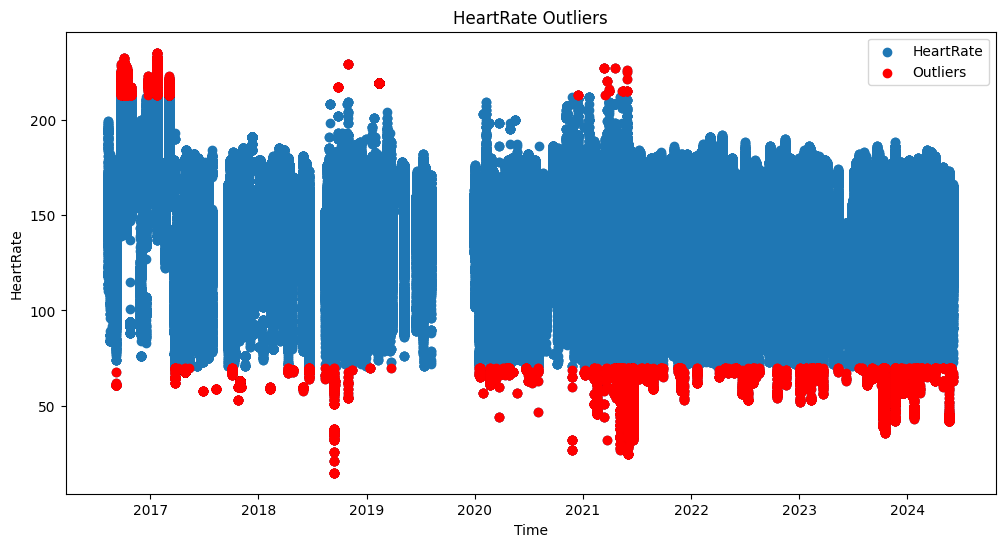

In [45]:
import numpy as np

# identify outliers in 'Distance'
distance_outliers = data[np.abs(data['Distance'] - data['Distance'].mean()) > (3 * data['Distance'].std())]

# identify outliers in 'HeartRate'
heartrate_outliers = data[np.abs(data['HeartRate'] - data['HeartRate'].mean()) > (3 * data['HeartRate'].std())]

# plot distance outliers
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['Distance'], label='Distance')
plt.scatter(distance_outliers['Time'], distance_outliers['Distance'], color='red', label='Outliers')
plt.title('Distance Outliers')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.show()

# plot HeartRate outliers
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['HeartRate'], label='HeartRate')
plt.scatter(heartrate_outliers['Time'], heartrate_outliers['HeartRate'], color='red', label='Outliers')
plt.title('HeartRate Outliers')
plt.xlabel('Time')
plt.ylabel('HeartRate')
plt.legend()
plt.show()

In [46]:
distance_outliers['Distance'].unique()

array([18669.90039062, 18673.        , 18676.30078125, ...,
       24723.        , 24723.80078125, 24724.19921875])

In [47]:
heartrate_outliers['HeartRate'].unique()

array([ 62,  67,  68,  69,  70,  64,  65,  66,  58,  60,  61,  63,  59,
        56,  54,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,
        53,  55,  57,  15,  21,  26,  37,  38,  36,  35,  33,  32, 217,
       229, 219, 214, 216, 218, 215, 213, 220, 223, 226, 228, 225, 224,
       222, 221, 227, 232, 231, 230, 233, 234, 235,  41,  39,  40,  27,
        30,  28,  34,  29,  25])

In [48]:
from pathlib import Path
from csv import DictReader
from datetime import datetime
from itertools import groupby

import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

from typing import Any, Dict, Iterable, List

with Path("processed_data/filled_in.csv").open("r") as f:
    data_filled = list(DictReader(f))


In [49]:
def get_time(point: Dict[str, Any]) -> datetime:
    "Get the time in python datetime format from a point dict"
    return datetime.fromisoformat(point["Time"])


def unclean_runs(data: List[Dict[str, Any]]) -> Iterable[str]:
    for runid, run in groupby(data, lambda x: x["RunID"]):
        run = sorted(run, key=get_time)
        if len(run) < 300:
            yield runid
            continue
        if (get_time(run[-1]) - get_time(run[0])).total_seconds() < 300:
            yield runid
            continue
        if max(float(point["Distance"]) for point in run) < 500:
            yield runid
            continue


def remove_unclean_runs(data: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    "Remove the runs that fit the criteria for a useless run"
    unclean_run_ids = set(unclean_runs(data))
    print(f"Removing {len(unclean_run_ids)} runs because they are unusable.")
    return [point for point in data if point["RunID"] not in unclean_run_ids]


def remove_trailing(data: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    "Remove the first and last 10 points of each run."
    return [
        point
        for _, run in groupby(data, lambda x: x["RunID"])
        for point in sorted(run, key=get_time)[10:-10]
    ]


def remove_unreasonable_values(data: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    ret = [
        point
        for point in data
        if float(point["HeartRate"]) < 220
        if float(point["HeartRate"]) > 20
        if float(point["Distance"]) < 50_000
        if float(point["Speed"]) < 8
        if float(point["Speed"]) >= 0
    ]
    print(f"Removed {len(data) - len(ret)} out of {len(data)} points")
    print(f"{((len(data) - len(ret))/len(data))*100}%, because they are unreasonable")
    return ret


def smoothen_speed(data: List[Dict[str, Any]], alpha: float) -> List[Dict[str, Any]]:
    """Performs exponential smoothening on the speed variable"""
    smoothened_speed = []
    for _, group in groupby(data, lambda x: x["RunID"]):
        group = sorted(group, key=get_time)
        prev = float(group[0]["Speed"])
        for point in group:
            newval = (alpha * prev) + (1 - alpha) * float(point["Speed"])
            smoothened_speed.append(point | {"Speed": newval})
            prev = newval
    return smoothened_speed

data_filled = smoothen_speed(remove_trailing(remove_unclean_runs(remove_unreasonable_values(data_filled))), 0.5)


Removed 2176 out of 1671330 points
0.13019571239671401%, because they are unreasonable
Removing 23 runs because they are unusable.


In [50]:
clf = LocalOutlierFactor()
indata = [
    [float(point["HeartRate"]), float(point["Speed"]), float(point["Distance"])]
    for point in data_filled
]
labels = clf.fit_predict(indata)

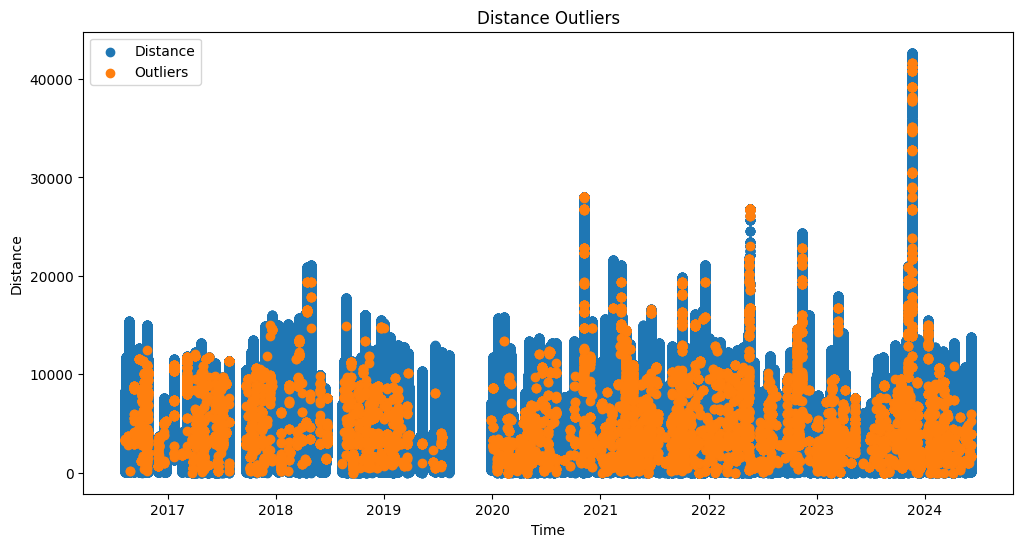

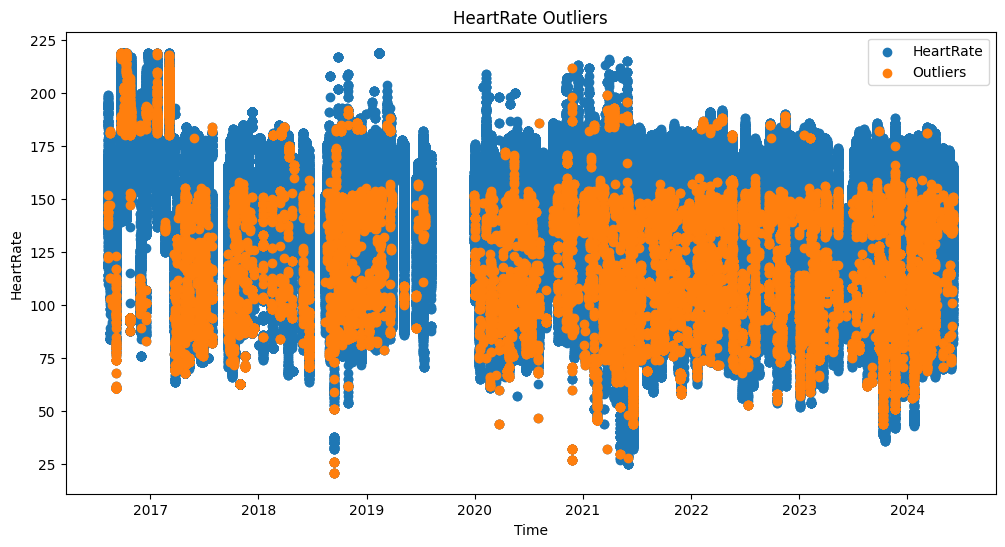

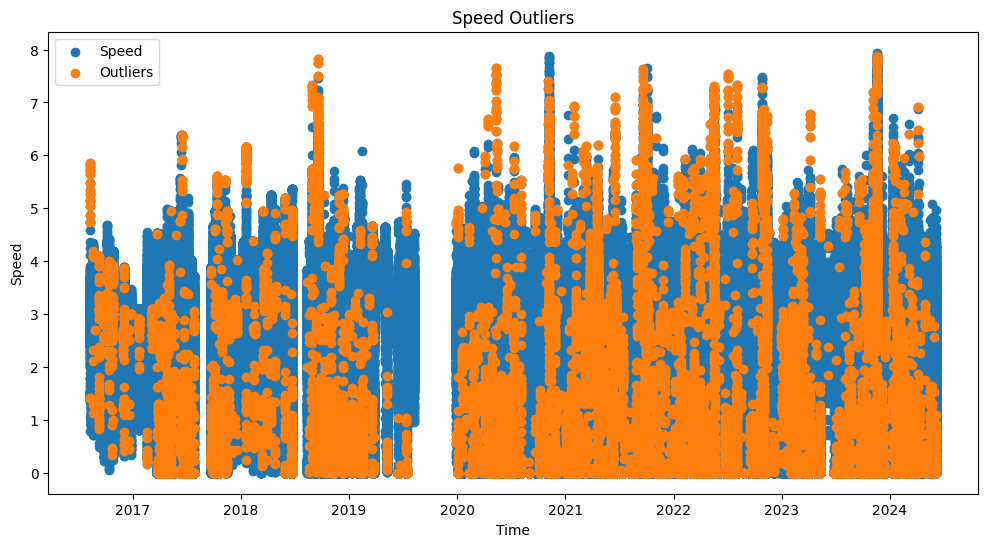

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(
    [datetime.fromisoformat(point["Time"]) for point in data_filled],
    [float(point["Distance"]) for point in data_filled],
    label="Distance",
)
plt.scatter(
    [
        datetime.fromisoformat(point["Time"])
        for label, point in zip(labels, data_filled)
        if label == -1
    ],
    [float(point["Distance"]) for label, point in zip(labels, data_filled) if label == -1],
    label="Outliers",
)
plt.title("Distance Outliers")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(
    [datetime.fromisoformat(point["Time"]) for point in data_filled],
    [float(point["HeartRate"]) for point in data_filled],
    label="HeartRate",
)
plt.scatter(
    [
        datetime.fromisoformat(point["Time"])
        for label, point in zip(labels, data_filled)
        if label == -1
    ],
    [
        float(point["HeartRate"])
        for label, point in zip(labels, data_filled)
        if label == -1
    ],
    label="Outliers",
)
plt.title("HeartRate Outliers")
plt.xlabel("Time")
plt.ylabel("HeartRate")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(
    [datetime.fromisoformat(point["Time"]) for point in data_filled],
    [float(point["Speed"]) for point in data_filled],
    label="Speed",
)
plt.scatter(
    [
        datetime.fromisoformat(point["Time"])
        for label, point in zip(labels, data_filled)
        if label == -1
    ],
    [float(point["Speed"]) for label, point in zip(labels, data_filled) if label == -1],
    label="Outliers",
)
plt.title("Speed Outliers")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.legend()
plt.show()


## K-means Clustering

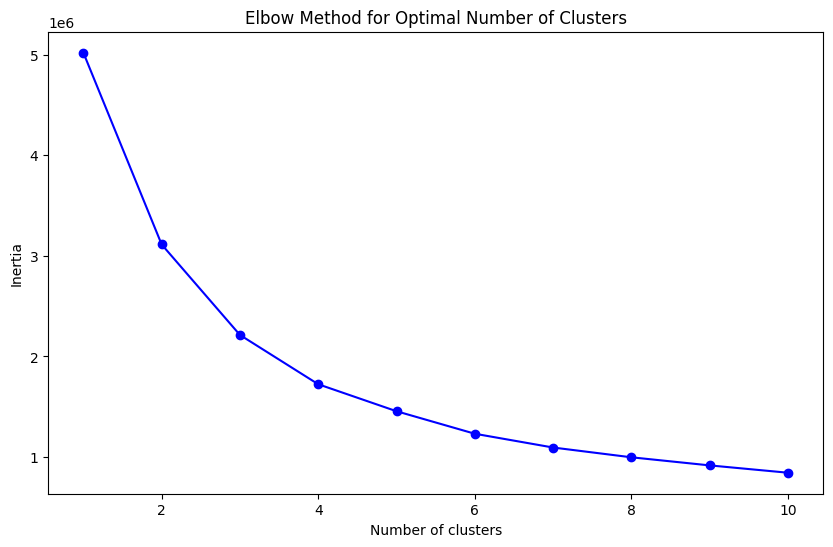

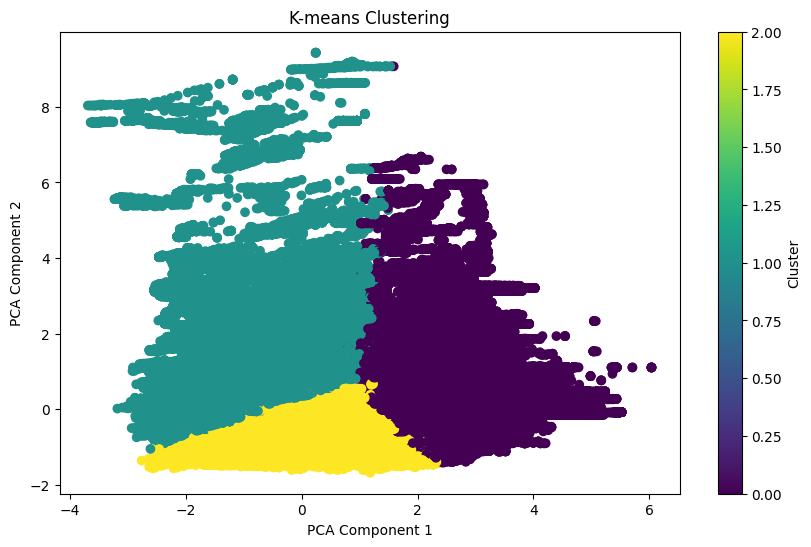

In [52]:
# select features for clustering
features = data[['Distance', 'HeartRate', 'Cadence']]

# filling missing values with the mean of the column
features = features.fillna(features.mean())

# standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# determine the optimal number of clusters (elbow method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# choose the optimal clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()